In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split


In [2]:
N = 10000 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.15)

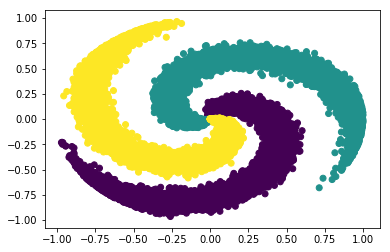

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y);

In [4]:
with open('train_dataset.p', 'wb') as output:
    pickle.dump({'X': X_train, 'y_train': y}, output)

with open('test_dataset.p', 'wb') as output:
    pickle.dump({'X': X_test, 'y': y_test}, output)

np.savetxt("train_dataset.csv", np.column_stack([X_train, y_train]), delimiter=",", header="x, y, category", comments='')
np.savetxt("test_dataset.csv", np.column_stack([X_test, y_test]), delimiter=",", header="x, y, category", comments='')